In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,mean_squared_error,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import random


In [2]:
#df=pd.read_csv('https://raw.githubusercontent.com/mohitpawar473/USA-Housing-Dataset/master/USA_Housing.csv')
df=pd.read_csv('https://raw.githubusercontent.com/dnishimoto/python-deep-learning/master/idaho_housing_prices.csv')


In [3]:
print(df.shape)
print(df.info())

(81, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    81 non-null     int64  
 1   Avg. Area Income              81 non-null     float64
 2   Avg. Area House Age           81 non-null     float64
 3   Avg. Area Number of Rooms     81 non-null     float64
 4   Avg. Area Number of Bedrooms  81 non-null     float64
 5   Area Population               81 non-null     float64
 6   Price                         81 non-null     float64
 7   Address                       81 non-null     object 
dtypes: float64(6), int64(1), object(1)
memory usage: 5.2+ KB
None


In [4]:
filter=df['Address'].str.contains('ID ')
df=df[filter]
print(df.head())
df.reindex()
#df.to_csv('idaho_housing_prices.csv')

features=[ 'Avg. Area Income',
 'Avg. Area House Age',
 'Avg. Area Number of Rooms',
 'Avg. Area Number of Bedrooms',
 'Area Population']

X=df[features]
X['Avg. Area Income']=X['Avg. Area Income'].astype(float)
X['Avg. Area House Age']=X['Avg. Area House Age'].astype(float)
X['Avg. Area Number of Rooms']=X['Avg. Area Number of Rooms'].astype(float)
X['Avg. Area Number of Bedrooms']=X['Avg. Area Number of Bedrooms'].astype(float)
X['Area Population']=X['Area Population'].astype(float)


y=df['Price'].astype(float)


   Unnamed: 0  Avg. Area Income  Avg. Area House Age  \
0          33      50218.708463             6.118808   
1          43      70421.476488             6.907083   
2          89      67561.942060             5.251401   
3         122      86924.358766             6.832940   
4         142      66547.181752             6.350672   

   Avg. Area Number of Rooms  Avg. Area Number of Bedrooms  Area Population  \
0                   7.333554                          6.29     16810.783311   
1                   7.634319                          4.44     43183.928488   
2                   7.658576                          4.04     35517.541870   
3                   7.738296                          6.32     28719.410888   
4                   5.305000                          2.04     16741.964987   

          Price                                            Address  
0  5.343051e+05              039 Jordan Pike\nEmilyville, ID 27442  
1  1.744932e+06  580 Lara Neck Apt. 541\nDavidsons

C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:16: SettingWithCop

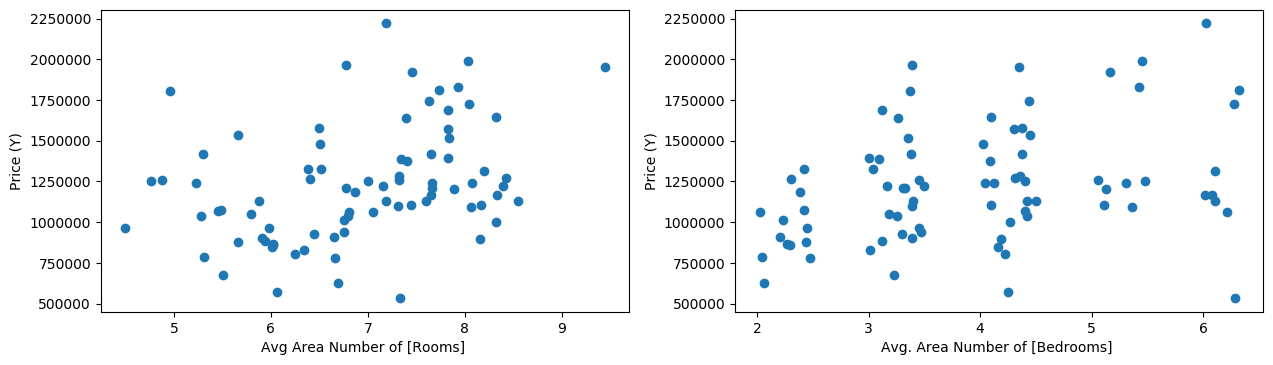

In [9]:
plt.figure(figsize = (15,4),dpi=100)
plt.subplot(121)
plt.scatter(X['Avg. Area Number of Rooms'],y)
plt.xlabel("Avg Area Number of [Rooms] ")
plt.ylabel("Price (Y)")
plt.subplot(122)
plt.scatter(X['Avg. Area Number of Bedrooms'],y)
plt.xlabel("Avg. Area Number of [Bedrooms] ")
plt.ylabel("Price (Y)")

plt.show()

In [10]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [26]:
xg_reg = xgb.XGBRegressor(objective='reg:linear', n_estimators=200, subsample=0.45, learning_rate=0.2, seed=123)

xg_reg.fit(X_train, y_train)

y_pred= xg_reg.predict(X_test)

[05:50:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [27]:

rmse=np.sqrt(mean_squared_error(y_test,y_pred))

print("RMSE: %f" %(rmse))

RMSE: 136204.215207


In [28]:
DM_train = xgb.DMatrix(data=X_train, label=y_train)
DM_test = xgb.DMatrix(data=X_test,label=y_test)

#params={"booster":"gblinear","objective":"reg:linear"}
params={"booster":"gblinear","objective":"reg:squarederror"}

xg_reg=xgb.train(params=params, dtrain=DM_train, num_boost_round=10)

y_pred=xg_reg.predict(DM_test)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))

print("RMSE: %f" %(rmse))

RMSE: 309796.013498


In [29]:
# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=DM_train, params=params, nfold=4, num_boost_round=10, metrics="rmse", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final boosting round metric
print(cv_results["test-rmse-mean"].tail(1))

   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0    946498.375000    20138.264240   960096.343750   89488.450412
1    697094.421875    15191.580590   716726.921875   94540.108831
2    519177.828125    11836.276040   554517.250000   89057.377323
3    392237.570312    10161.322092   440574.742188   85081.536940
4    298279.968750     8668.694849   374197.710938   86172.389507
5    230703.023438     7942.099988   315457.917969   87398.250363
6    179808.859375     6681.578467   279895.984375   74269.086830
7    141405.468750     5775.784538   255074.542969   65002.774666
8    113431.314453     4990.249904   237123.441406   56812.777434
9     91467.771484     3989.035394   227198.414062   49763.119649
9    227198.414062
Name: test-rmse-mean, dtype: float64


In [30]:
print (X[features].mean())
print(y.mean())


Avg. Area Income                69672.134392
Avg. Area House Age                 5.984418
Avg. Area Number of Rooms           6.909152
Avg. Area Number of Bedrooms        3.945309
Area Population                 35381.132623
dtype: float64
1228173.1281823881


In [31]:
#keys = ['name', 'age', 'food']
#values = ['Monty', 42, 'spam']
#index=np.arange(0,len(keys)-1)
#df=pd.DataFrame(list(zip(keys,values)), columns=['keys','values'])
#df.set_index('keys')
#print(df.head())
#data_dict = df.iloc[index].set_index('keys')['values'].to_dict() 
#print(data_dict)


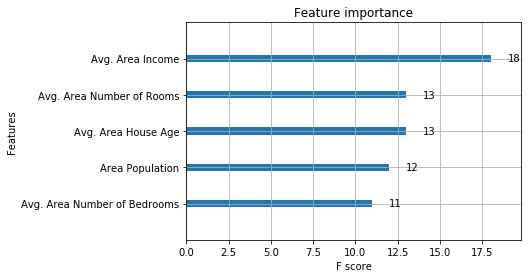

In [32]:
# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":4}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=DM_train, num_boost_round=10)

#xgb.plot_tree(xg_reg,num_trees=3)
#plt.show()

# Plot the feature importances
xgb.plot_importance(xg_reg)
plt.show()




In [33]:
gbm_param_grid = {'learning_rate':[0.01,0.1,0.5,0.9], \
                'n_estimators':[200],\
                'subsample':[0.3,0.5,0.9],\
                #'objective':'reg:squarederror'
                 }

gbm=xgb.XGBRegressor()

grid_mse=GridSearchCV(estimator=gbm, param_grid=gbm_param_grid,
scoring='neg_mean_squared_error', cv=4, verbose=1)
grid_mse.fit(X,y)




Fitting 4 folds for each of 12 candidates, totalling 48 fits
[05:50:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:50:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:50:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:50:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:50:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:50:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[05:50:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:50:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:50:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:50:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:50:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:50:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:50:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:50:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:50:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    1.7s finished
C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.01, 0.1, 0.5, 0.9], 'n_estimators': [200], 'subsample': [0.3, 0.5, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [35]:
print("Best parameters found:", grid_mse.best_params_)
print("Lowest RMSE found:", np.sqrt(grid_mse.best_score_))

Best parameters found: {'learning_rate': 0.1, 'n_estimators': 200, 'subsample': 0.5}
Lowest RMSE found: nan


C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


In [18]:
#20 values for learning rate and 20 values for subsample
param_dist = {'learning_rate':np.arange(0.05,1.05,.05), 'n_estimators':[200], 'subsample':np.arange(0.05,1.05,.05),}

gbm=xgb.XGBRegressor()

random_search = RandomizedSearchCV(estimator=gbm,param_distributions=param_dist, n_iter=25,
scoring='neg_mean_squared_error',cv=4,verbose=1)

random_search.fit(X, y)




Fitting 4 folds for each of 25 candidates, totalling 100 fits
[05:47:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[05:47:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[05:47:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.1s finished
C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
          fit_params=None, iid='warn', n_iter=25, n_jobs=None,
          param_distributions={'learning_rate': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]), 'n_estimators': [200], 'subsample': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])},
          pre_dispatch='2*n_jobs', random_state=None, r

In [34]:
print("Best Parameters",random_search.best_params_)
print("Lowest RMSE found:",np.sqrt(np.abs(random_search.best_score_)))

Best Parameters {'subsample': 0.45, 'n_estimators': 200, 'learning_rate': 0.2}
Lowest RMSE found: 142244.0783565733
